In [61]:
%matplotlib inline 
from __future__ import division
import cv2         # opencv itself
import numpy as np # matrix manipulations
import random
from math import sqrt

from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (6.0, 6.0)

from the_collector import BagReader

In [41]:
def normalize(sensor):
    for i, s in enumerate(sensor):
        x,y,z = s
        mag = sqrt(x**2 + y**2 + z**2)
        sensor[i] = [x/mag, y/mag, z/mag]
    return sensor

In [42]:
%ls

imu-1-2.json*  imu-1.json*    sensors.ipynb*


In [43]:
bgr = BagReader()
bgr.use_compression = True
data = bgr.load('imu-1-2.json')

In [44]:
for key in data.keys():
    print key, len(data[key])

gyro 585
camera 585
accel 585
mag 585
b64keys 1


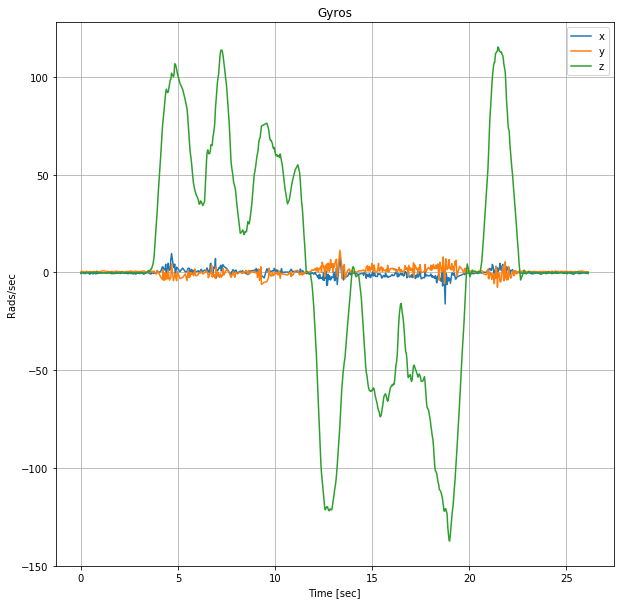

In [45]:
gyros = []
gdt = []
start = data['gyro'][0][1]
for g, dt in data['gyro']:
    gyros.append(g)
    gdt.append(dt - start)
plt.plot(gdt, gyros)
plt.title('Gyros')
plt.xlabel('Time [sec]')
plt.ylabel('Rads/sec')
plt.grid(True)
plt.legend(['x','y','z'])

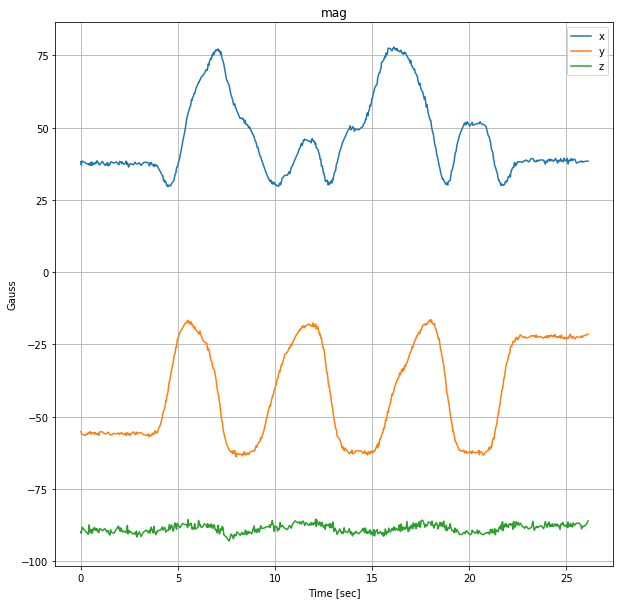

In [46]:
mag = []
mdt = []
start = data['mag'][0][1]
for m, dt in data['mag']:
    mag.append(m)
    mdt.append(dt - start)
    
# mag = normalize(mag)
    
plt.plot(mdt, mag)
plt.title('mag')
plt.xlabel('Time [sec]')
plt.ylabel('Gauss')
plt.grid(True)
plt.legend(['x','y','z'])

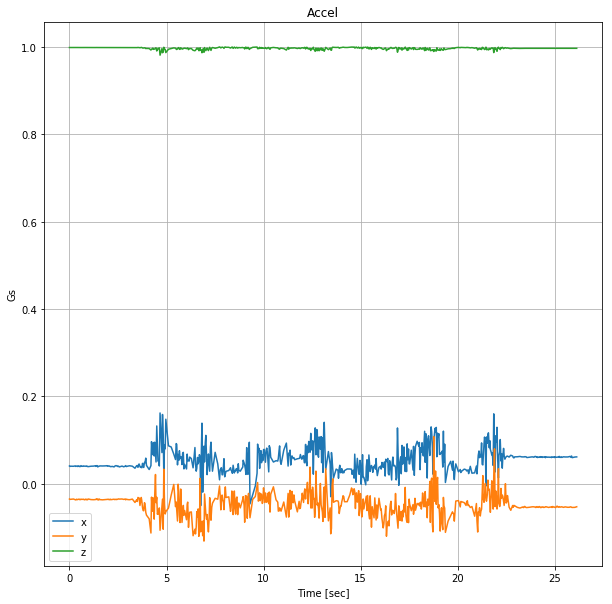

In [52]:
accel = []
adt = []
start = data['accel'][0][1]
for a, dt in data['accel']:
    accel.append(a)
    adt.append(dt - start)
    
accel = normalize(accel)
    
plt.plot(adt, accel)
plt.title('Accel')
plt.xlabel('Time [sec]')
plt.ylabel('Gs')
plt.grid(True)
plt.legend(['x','y','z'])

In [51]:
d = sqrt(1**2 + 0.05**2 + 0.05*2)
.05/d
1.05/d

1.0

(240, 320, 3)


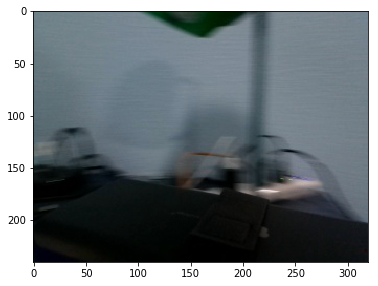

In [62]:
f,ts = data['camera'][100]
plt.imshow(f)
print(f.shape);

In [63]:
# simple function to save a video
import platform
def videoWrite(frames, fname='out.mp4'):
    frame_height, frame_width, _ = frames[0].shape
    
    # pick a good encoder for the current OS
    sys = platform.system()
    if sys in ['Darwin']:
        fourcc = 'avc1'
    else:
        fourcc = 'mjpg'
        
    out = cv2.VideoWriter(
        fname,
        cv2.VideoWriter_fourcc(*fourcc), 
        30, 
        (frame_width,frame_height))
    for frame in frames:
        out.write(frame)
    out.release()

In [64]:
frames = []
for f, ts in data['camera']:
    frames.append(f)

videoWrite(frames, 'sensor_data.mp4')